In [1]:
# For dealing with files
import os
import shutil
from pathlib import Path
# For saving data matrix
import numpy as np
import random

# For normalising data
from statistics import pstdev,mean
# For using regex expressions
import re

In [12]:
# save where you currently are (for coming back afterwards)
#old_path = path('C:\Users\bjorn\Documents\Repositories\deep-machine-learning\Project')
old_path = os.getcwd()
# cd to sequencec directory
os.chdir('sequences')
'''# Get a list of all filenames inside
files = os.listdir()
print(files[0:10])
# Filter list using regex expressions
r_testimg_inputdata = re.compile('testimg.*.inputdata.txt')
r_trainimg_inputdata = re.compile('trainimg.*.inputdata.txt')
print(type(r_testimg_inputdata))
#all_train_filenames = list(filter(r_trainimg_inputdata.match, files))
#all_test_filenames = list(filter(r_testimg_inputdata.match, files))'''

# Fulhax galore pga pallar inte mer
prefix_train='trainimg-'
prefix_test='testimg-'
suffix='-inputdata.txt'
all_train_filenames = [prefix_train+str(i)+suffix for i in range(60000)]
all_test_filenames = [prefix_test+str(i)+suffix for i in range(10000)]



def preproces_data(filenames,absolute_coord=True,max_sequence_length=None):
    if max_sequence_length==None:
        max_sequence_length=117
    # pre-allocate data matrix
    nbrSequences=len(filenames)
    nbr_features = 4      
    data_tmp = np.empty((nbrSequences,max_sequence_length,nbr_features),dtype=np.int8)
    hist_data = np.zeros(nbrSequences)
    
    # Counter to keep track of number of sequences shorter than 61
    count_seq=0
    
    for sequnce_ix, file in enumerate(filenames):
        list_of_sequence=open(file, 'r').readlines()
        length_sequence = len(list_of_sequence)
        if length_sequence<=max_sequence_length:
            # How large padding is needed?
            padding = max_sequence_length-length_sequence
            count_seq+=1
            hist_data[sequnce_ix]=length_sequence
            if sequnce_ix%1000==0:
                print(sequnce_ix)
            tmp=np.empty((length_sequence,nbr_features))
            for time_ix,row in enumerate(list_of_sequence):
                (dx,dy,eos,eod) = [int(i) for i in row.split(' ')]
                tmp[time_ix]=[dx,dy,eos,eod]
            if absolute_coord:
                tmp=np.cumsum(tmp,axis=0) # Transform to absolute coordinates
                tmp_mean_x = mean(tmp[:,0])
                tmp_mean_y = mean(tmp[:,1])
                tmp[:,0] -= tmp_mean_x
                tmp[:,1] -= tmp_mean_y
                if padding>0:
                    #Pick 'padding' number of random integers between 0 (inclusive) and length of sequence (exclusive)
                    sample_range=range(length_sequence-1)
                    if padding>length_sequence:
                        random_ix_tmp = np.asarray(random.sample(sample_range,length_sequence-1))
                        #print(padding,length_sequence,len(rand_ix_tmp))
                    else:
                        random_ix_tmp = np.asarray(random.sample(sample_range,padding-1))
                        
                    #random_ix = np.random.randint(0, high=length_sequence-1, size=padding)
                    #random_ix=np.sort(random_ix)[::-1]
                    #print(random_ix)
                    midpoints_to_insert = np.empty((len(random_ix_tmp),4))
                    for counter_ix,padd_ix in enumerate(random_ix_tmp): # Loops in reverse order to not interfer with later inserts
                        (x1,x2) = tmp[padd_ix:padd_ix+2,0]
                        (y1,y2) = tmp[padd_ix:padd_ix+2,1]
                        midpoints_to_insert[counter_ix,:] = [(x1 + x2)/2,(y1 + y2)/2,0,0]
                    #print('tmp',type(tmp))
                    #print('random_ix_tmp',type(random_ix_tmp))
                    #print('midpoints_to_insert',type(midpoints_to_insert))
                    tmp=np.insert(tmp,random_ix_tmp+1,midpoints_to_insert, axis=0)
                while len(tmp)<max_sequence_length:
                    random_ix = np.random.randint(0, high=length_sequence-1, size=1)
                    (x1,x2) = tmp[padd_ix:padd_ix+2,0]
                    (y1,y2) = tmp[padd_ix:padd_ix+2,1]
                    midpoint_to_insert = np.asarray([(x1 + x2)/2,(y1 + y2)/2,0,0])
                    #print(type(midpoint_to_insert))
                    #print('tmp',type(tmp))
                    #print('random_ix',type(random_ix))
                    #print('midpoint_to_insert',type(midpoint_to_insert))
                    tmp=np.insert(tmp,random_ix+1,midpoint_to_insert, axis=0)
                
                
            else:
                # Set start to origin for all numbers
                tmp[0,0] = 0
                tmp[0,1] = 0
            #print(len(tmp))
            data_tmp[sequnce_ix,-max_sequence_length:,:]=tmp.copy()
    print(count_seq)
    data = data_tmp[:count_seq,:,:]
    print('Datan',data)
    print('HIST Datan',hist_data)
    return data,hist_data


test_data_abs_coord, test_hist_data = preproces_data(all_test_filenames,absolute_coord=True,max_sequence_length=60)
train_data_abs_coord, train_hist_data = preproces_data(all_train_filenames,absolute_coord=True,max_sequence_length=60)
#test_data_rel_coord, test_hist_data = preproces_data(all_test_filenames,absolute_coord=False,max_sequence_length=60)
#train_data_rel_coord, train_hist_data = preproces_data(all_train_filenames,absolute_coord=False,max_sequence_length=60)
os.chdir(old_path)

0


C:\Users\bjorn\AppData\Local\conda\conda\envs\dml_gpu\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: using a non-integer array as obj in insert will result in an error in the future


1000
2000
3000
4000
5000
6000
7000
8000
9000
9816
Datan [[[ -7  -5   0   0]
  [ -6  -5   0   0]
  [ -5  -5   0   0]
  ...
  [ -2  11   0   0]
  [ -2  11   0   0]
  [ -2  11   1   1]]

 [[ -5  -8   0   0]
  [ -5  -9   0   0]
  [ -4  -9   0   0]
  ...
  [ 10   5   0   0]
  [ 10   5   0   0]
  [ 10   5   1   1]]

 [[  2  -9   0   0]
  [  2  -8   0   0]
  [  2  -6   0   0]
  ...
  [ -3   8   0   0]
  [ -3   8   0   0]
  [ -3   8   1   1]]

 ...

 [[ -4  -4   0   0]
  [ -4  -4   0   0]
  [ -4  -3   0   0]
  ...
  [  6  -8   1   0]
  [  6  -8   0   0]
  [  6  -8   2   1]]

 [[  7  -7   0   0]
  [  7  -7   0   0]
  [  6  -7   0   0]
  ...
  [ -6   7   0   0]
  [ -6   7   0   0]
  [ -6   7   1   1]]

 [[  5 -10   0   0]
  [  4 -10   0   0]
  [  4 -10   0   0]
  ...
  [ -1  -1   0   0]
  [ -1  -1   0   0]
  [ -1  -1   1   1]]]
HIST Datan [31. 41. 20. ... 33. 38. 56.]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
2300

(9816, 60, 4)


C:\Users\bjorn\AppData\Local\conda\conda\envs\dml_gpu\lib\site-packages\matplotlib\axes\_base.py:3455: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


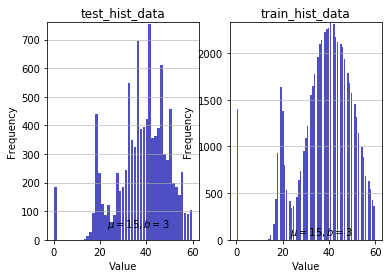

In [14]:
import matplotlib.pyplot as plt
print(test_data_abs_coord.shape)
# An "interface" to matplotlib.axes.Axes.hist() method
plt.subplot(1,2,1)
n, bins, patches = plt.hist(x=test_hist_data, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('test_hist_data')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.subplot(1,2,2)
n, bins, patches = plt.hist(x=train_hist_data, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('train_hist_data')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [15]:
#np.save('test_data_rel_coord_60_no_zero.npy',test_data_rel_coord)
#np.save('train_data_rel_coord_60_no_zero.npy',train_data_rel_coord)
np.save('test_data_abs_coord_no_zero.npy',test_data_abs_coord)
np.save('train_data_abs_coord_no_zero.npy',train_data_abs_coord)

In [11]:
os.chdir(old_path)